# Using ROC-AUC graoh to choose between Logistic regression and Random Forest

### Predicting obesity based on weight



###1.   Installing packages



In [9]:
#### Installation des packages

install.packages("pROC")
install.packages("ggplot2")
install.packages("randomForest")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





###   Load libraries



In [8]:

library(ggplot2) 
library(pROC) # calculating ROC-AUC
library(randomForest)


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin






### 2.   Generating the dataset



[1] 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0
 [38] 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1
 [75] 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

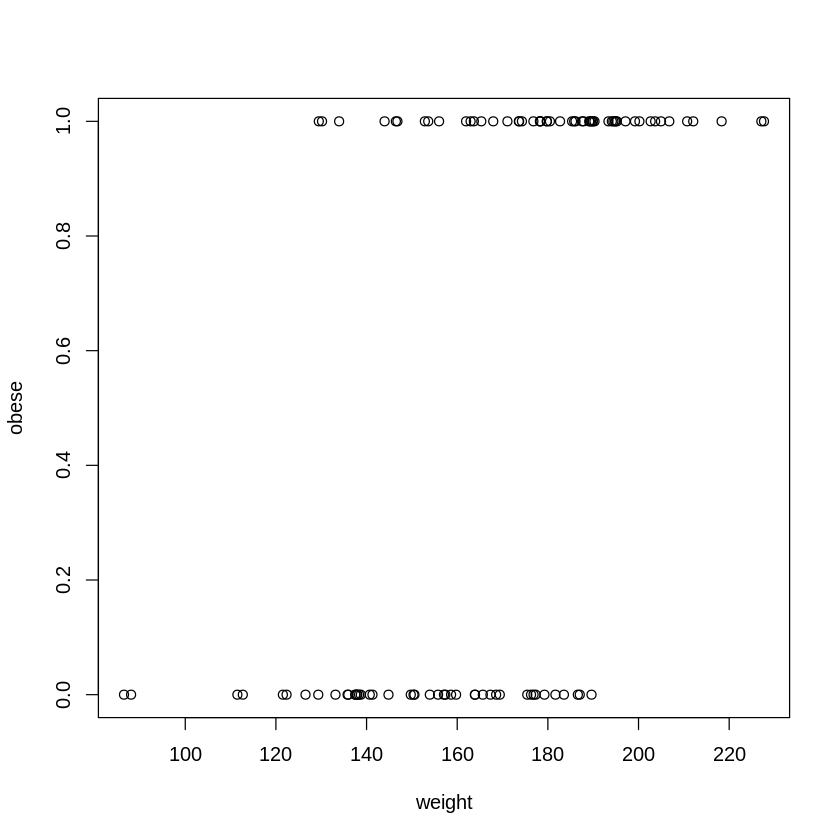

In [11]:

### Generate random data (normal distribution)
set.seed(420) # fix the seed to be able to reproduce the same random values
num.samples <- 100 # 100 individuals
weight <- sort(rnorm(n=num.samples, mean=172, sd=29))


### Randomly decide if each weight represents an obese individual or not
obese <- ifelse(test=(runif(n=num.samples) < (rank(weight)/num.samples)), yes=1, no=0)
  
## print the obrained results
obese 

## plot the data
plot(x=weight, y=obese)





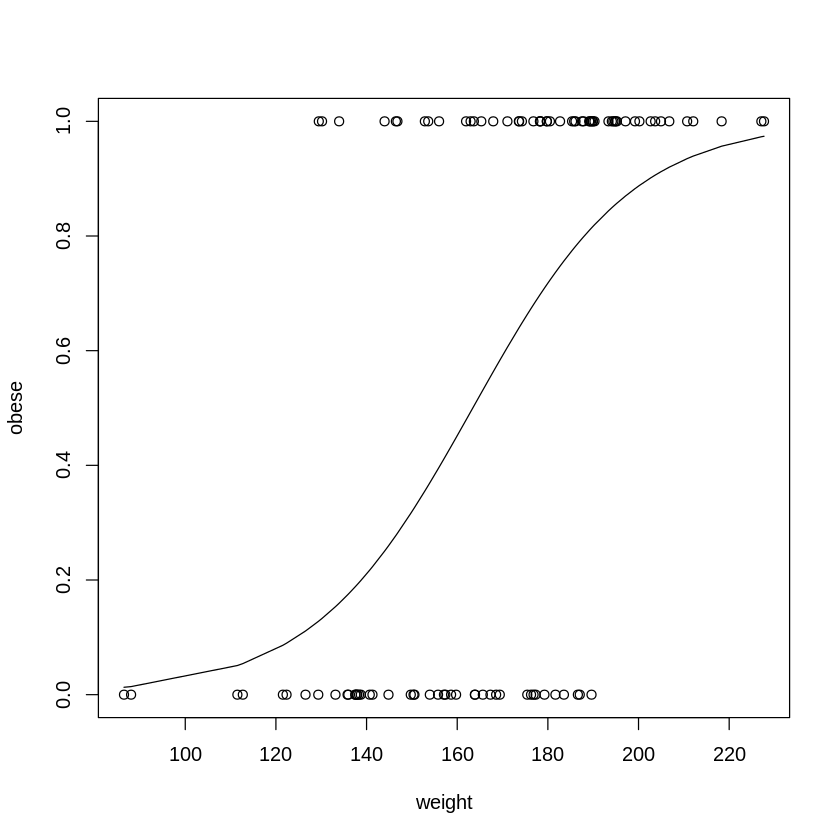

In [14]:
## fit a logistic regression to the data
plot(x=weight, y=obese)
glm.fit=glm(obese ~ weight, family=binomial)
lines(weight, glm.fit$fitted.values)

###3.   ROC-AUC graph: Logistic regression



In [22]:
roc.info <- roc(obese, glm.fit$fitted.values, legacy.axes=TRUE)
str(roc.info)

## extract just the information that we want from that variable.
roc.df <- data.frame(
  tpp=roc.info$sensitivities*100,  ## tpp = true positive percentage
  fpp=(1 - roc.info$specificities)*100,  ## fpp = false positive precentage
  thresholds=roc.info$thresholds)

## finding optimal threshold depending on needs 
roc.df




Setting levels: control = 0, case = 1

Setting direction: controls < cases



List of 15
 $ percent           : logi FALSE
 $ sensitivities     : num [1:101] 1 1 1 1 1 ...
 $ specificities     : num [1:101] 0 0.0222 0.0444 0.0667 0.0889 ...
 $ thresholds        : num [1:101] -Inf 0.0135 0.0325 0.0525 0.0702 ...
 $ direction         : chr "<"
 $ cases             : Named num [1:55] 0.128 0.133 0.159 0.25 0.278 ...
  ..- attr(*, "names")= chr [1:55] "9" "10" "12" "23" ...
 $ controls          : Named num [1:45] 0.0129 0.0141 0.0508 0.0542 0.0862 ...
  ..- attr(*, "names")= chr [1:45] "1" "2" "3" "4" ...
 $ fun.sesp          :function (thresholds, controls, cases, direction)  
 $ auc               : 'auc' num 0.829
  ..- attr(*, "partial.auc")= logi FALSE
  ..- attr(*, "percent")= logi FALSE
  ..- attr(*, "roc")=List of 15
  .. ..$ percent           : logi FALSE
  .. ..$ sensitivities     : num [1:101] 1 1 1 1 1 ...
  .. ..$ specificities     : num [1:101] 0 0.0222 0.0444 0.0667 0.0889 ...
  .. ..$ thresholds        : num [1:101] -Inf 0.0135 0.0325 0.0525 0.0702 ..

tpp,fpp,thresholds
<dbl>,<dbl>,<dbl>
100.00000,100.00000,-Inf
100.00000,97.77778,0.01349011
100.00000,95.55556,0.03245008
100.00000,93.33333,0.05250145
100.00000,91.11111,0.07017225
100.00000,88.88889,0.08798755
100.00000,86.66667,0.10043665
100.00000,84.44444,0.11938475
100.00000,82.22222,0.12807366


Here for exemple, if we crucially need to identify all obese people and we care less about falsly identifying some cases, choosing a threshold of 0.12807366 would give us the wanted results.
Choosing the correct threshold will allow us to correctly classify our future data.

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "False Positive Percentage",     ylab = "True Postive Percentage", col = "#377eb8", lwd = 4,     print.auc = TRUE)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 82.91%

Setting levels: control = 0, case = 1

Setting direction: controls < cases



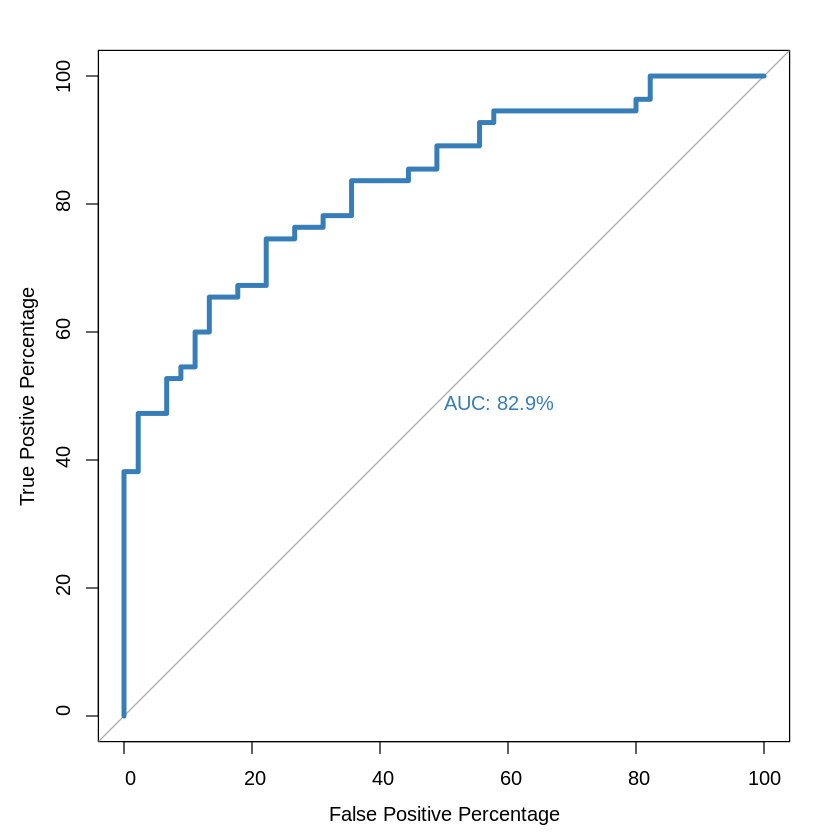


Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "False Positive Percentage",     ylab = "True Postive Percentage", col = "#377eb8", lwd = 4,     print.auc = TRUE, print.auc.x = 45, partial.auc = c(100,         90), auc.polygon = TRUE, auc.polygon.col = "#377eff22")

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Partial area under the curve (specificity 100%-90%): 4.727%

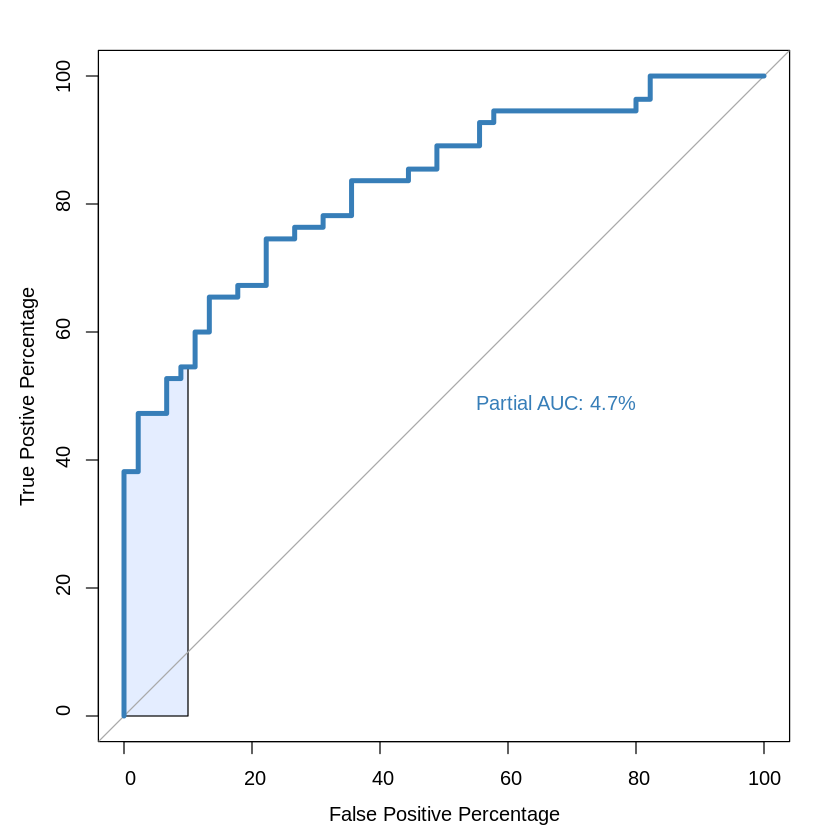

In [23]:
## Calculate the area under the curve:
roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE, percent=TRUE, xlab="False Positive Percentage", ylab="True Postive Percentage", col="#377eb8", lwd=4, print.auc=TRUE)

## Calculate the partial area under the curve.
roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE, percent=TRUE, xlab="False Positive Percentage", ylab="True Postive Percentage", col="#377eb8", lwd=4, print.auc=TRUE, print.auc.x=45, partial.auc=c(100, 90), auc.polygon = TRUE, auc.polygon.col = "#377eff22")



###4.   Comparing AUC values of Logistic regression with Random forest



Setting levels: control = 0, case = 1

Setting direction: controls > cases




Call:
roc.default(response = obese, predictor = rf.model$votes[, 1],     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "False Positive Percentage",     ylab = "True Postive Percentage", col = "#4daf4a", lwd = 4,     print.auc = TRUE)

Data: rf.model$votes[, 1] in 45 controls (obese 0) > 55 cases (obese 1).
Area under the curve: 79.29%

Setting levels: control = 0, case = 1

Setting direction: controls < cases



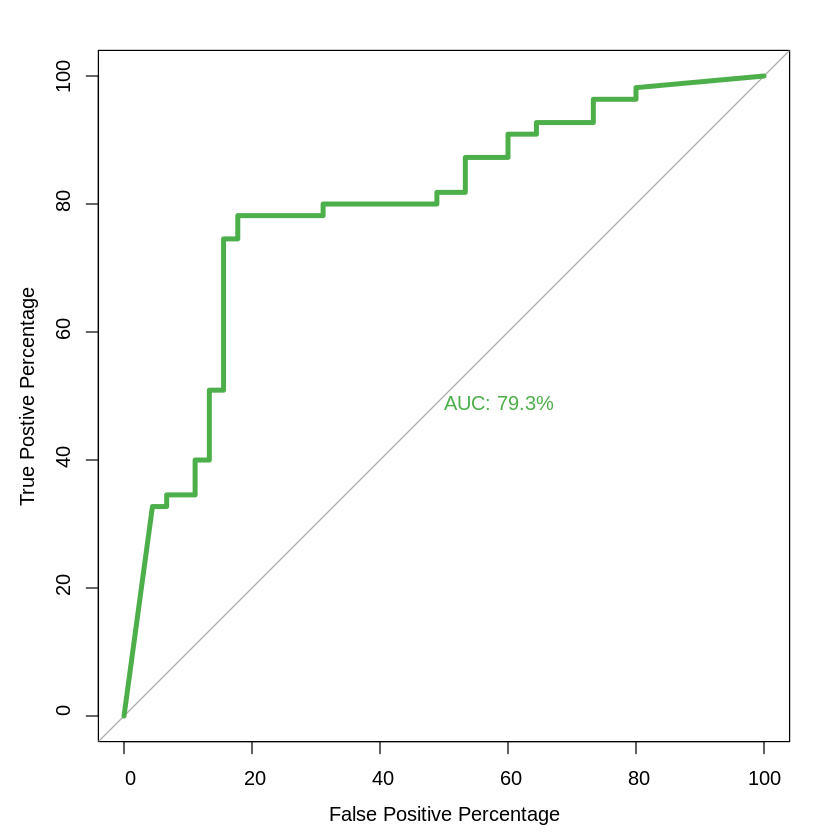


Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "False Positive Percentage",     ylab = "True Postive Percentage", col = "#377eb8", lwd = 4,     print.auc = TRUE)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 82.91%

Setting levels: control = 0, case = 1

Setting direction: controls > cases



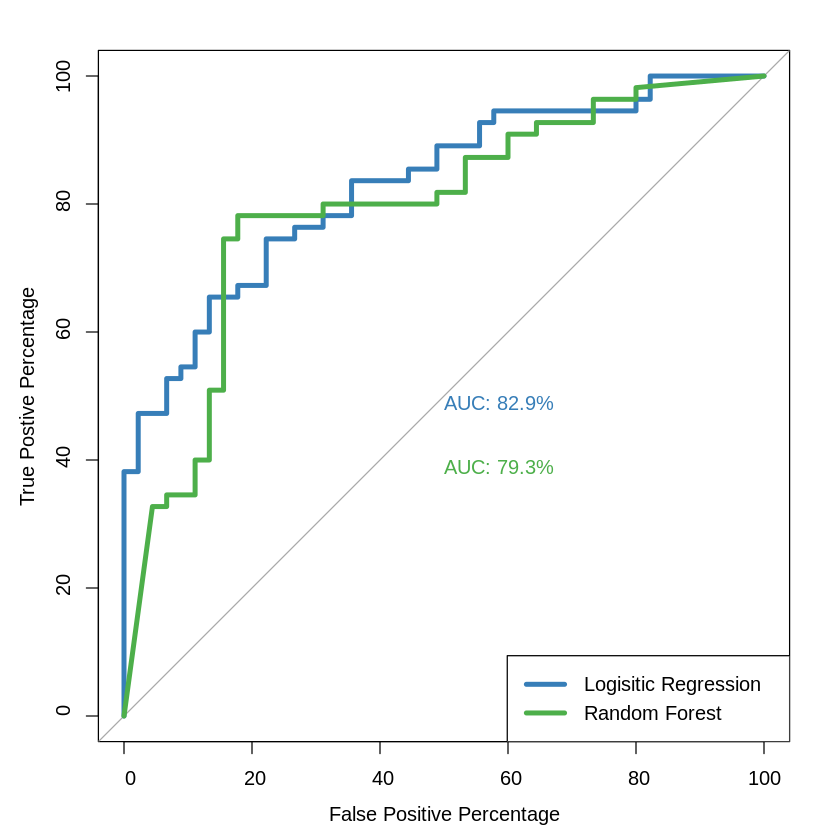

In [24]:
rf.model <- randomForest(factor(obese) ~ weight)

## ROC for random forest
roc(obese, rf.model$votes[,1], plot=TRUE, legacy.axes=TRUE, percent=TRUE, xlab="False Positive Percentage", ylab="True Postive Percentage", col="#4daf4a", lwd=4, print.auc=TRUE)

roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE, percent=TRUE, xlab="False Positive Percentage", ylab="True Postive Percentage", col="#377eb8", lwd=4, print.auc=TRUE)

plot.roc(obese, rf.model$votes[,1], percent=TRUE, col="#4daf4a", lwd=4, print.auc=TRUE, add=TRUE, print.auc.y=40)
legend("bottomright", legend=c("Logisitic Regression", "Random Forest"), col=c("#377eb8", "#4daf4a"), lwd=4)


Relying on the resulting AUC values we can say that Logistic regression works better for this case as it has the highest AUC value.

The higher the AUC value is, the better the model can predict whether the person is obese or not obese because the larger the area under the graph is, the more the ttp value gets bigger and the ftt value gets smaller.